In [2]:
from PredFunctions import *

In [3]:
df = pd.read_csv(f"df_d.csv", sep = ';', index_col = ['Date'], parse_dates = ['Date'])
df

,Николаевка,Овиный,Песчанка,Телевизорная,Ветлужанка,Солонцы
Date,,,,,,
2019-01-01,281.86,212.12,113.25,34.82,275.99,NaN
2019-01-02,141.32,82.82,64.40,13.83,130.26,NaN
2019-01-03,29.86,11.22,28.44,44.35,11.21,NaN
2019-01-04,160.40,118.31,64.94,21.91,190.42,NaN
2019-01-05,136.97,120.86,94.46,2.51,131.60,NaN
...,...,...,...,...,...,...
2022-04-07,10.22,2.14,8.27,4.16,1.58,26.26
2022-04-08,20.15,7.06,23.51,19.86,14.54,42.92
2022-04-09,10.33,2.05,10.89,2.61,1.78,22.28


In [4]:
# Работаем с Николаевкой
district = 'Николаевка'

Nik = df[district]
NikW = Nik.copy()

### Зима 2019-2020 год

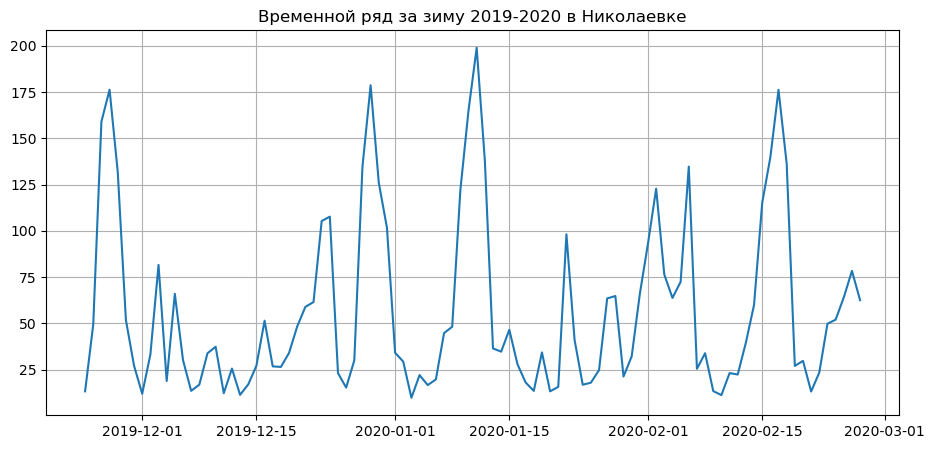

In [7]:
# Срез зимы 2019-2020 год
a, b = "2019-11-24", "2020-02-27"
c = "2020-02-21"
PlotSerie(Nik[a:b], 'Временной ряд за зиму 2019-2020 в Николаевке')

In [8]:
NikW = NikW[a : c]

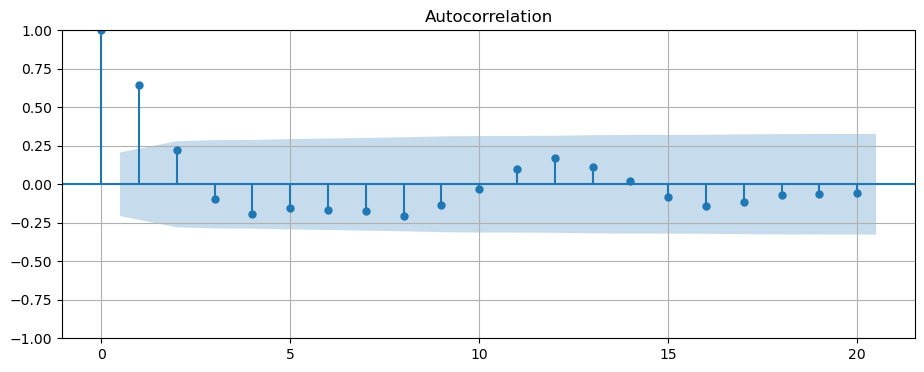

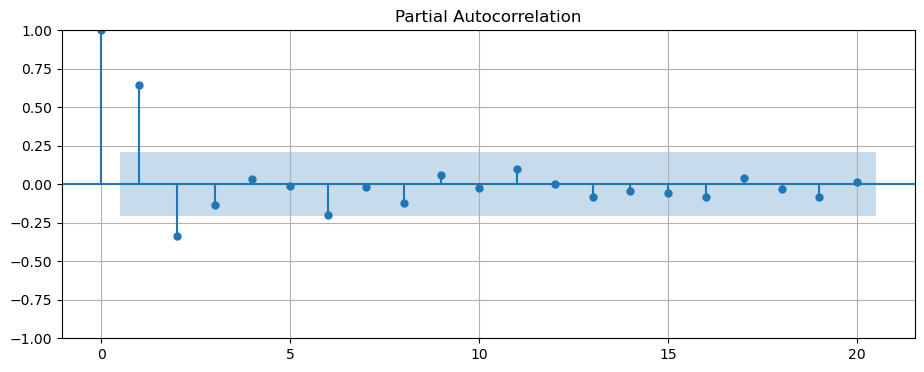

In [9]:
plotCF(NikW)

### Построение модели за декабрь 2019 года

In [10]:
# Оптимальные параметры p, d, q
optParam = optimize_SARIMA(NikW, p = 4 , d = 0, q = 2)
d = optParam[1]
optParam

  0%|          | 0/15 [00:00<?, ?it/s]

(4, 0, 1)

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,1.8289,0.075,24.427,0.000,1.682,1.976
ar.L2,-1.0281,0.229,-4.483,0.000,-1.478,-0.579
ar.L3,0.0414,0.286,0.145,0.885,-0.518,0.601
ar.L4,0.1578,0.145,1.090,0.276,-0.126,0.442
ma.L1,-0.9982,0.144,-6.919,0.000,-1.281,-0.715
sigma2,1174.4554,0.000,8.91e+06,0.000,1174.455,1174.456


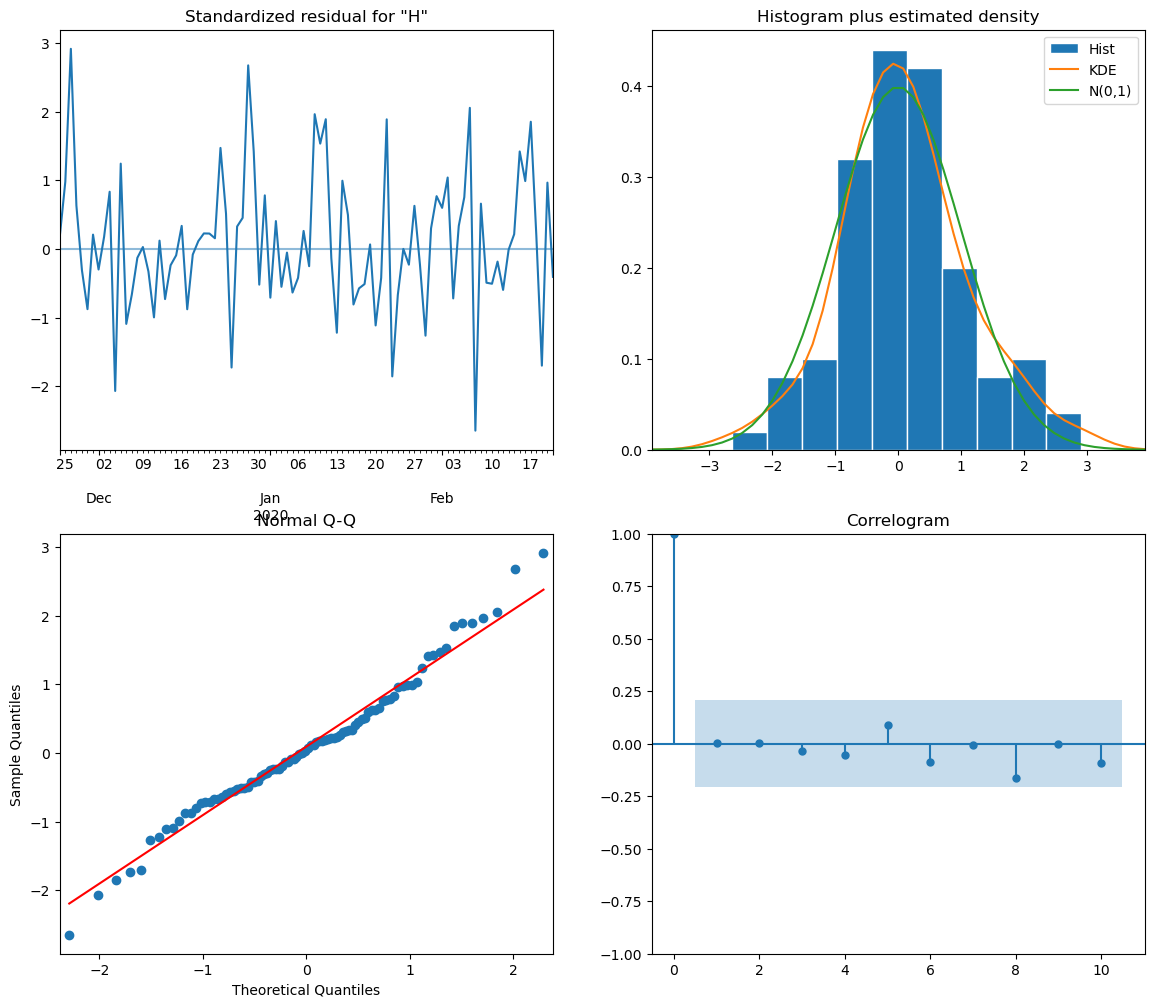

In [11]:
Wmodel = getModel(NikW, optParam, s = 0)

### Оценка качества модели

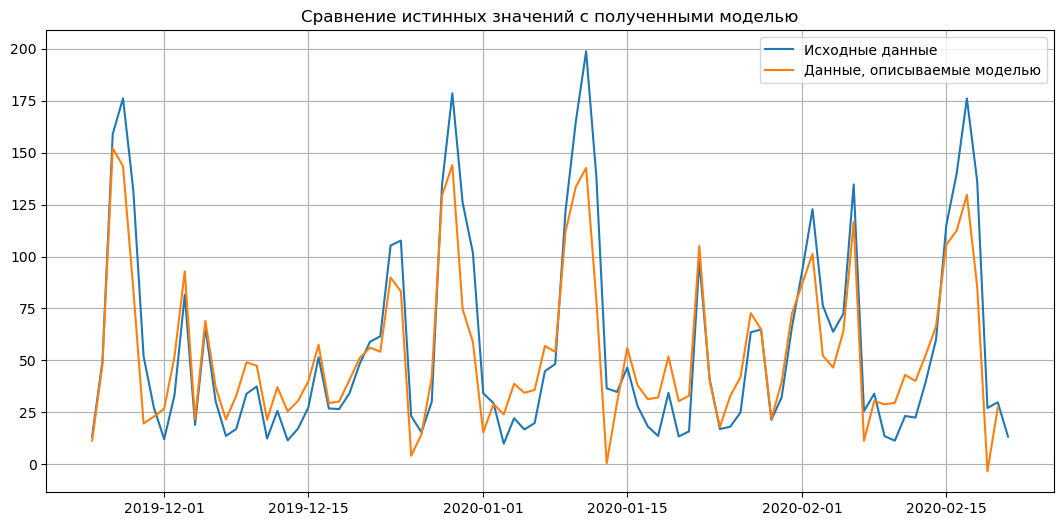

MAE: 15.389616456463798
R2: 0.8246749267769402


In [12]:
CompareModel(NikW, Wmodel, d)

### Прогнозирование на неделю вперёд

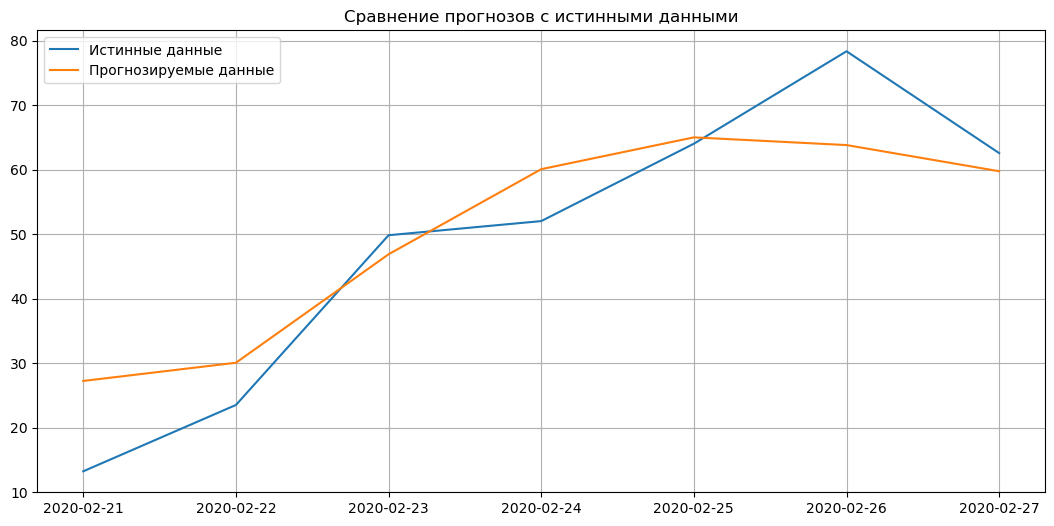

MAE: 7.127464146128991
R2: 0.833981482029934


In [13]:
startDate = c
endDate = b

predictions = GetPred(Wmodel, startDate, endDate)

ComparePred(Nik[startDate: endDate], predictions)